# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Dataset 

In [2]:
df = pd.read_csv('collaborative_filtering.csv')
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   userId  1000209 non-null  int64 
 1   movie   1000209 non-null  object
 2   rating  1000209 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 22.9+ MB


In [4]:
df.shape

(1000209, 3)

### Data Description

In [5]:
df.describe()

,userId,rating
count,1.000209e+06,1.000209e+06
mean,3.024512e+03,3.581564e+00
std,1.728413e+03,1.117102e+00
min,1.000000e+00,1.000000e+00
25%,1.506000e+03,3.000000e+00
50%,3.070000e+03,4.000000e+00
75%,4.476000e+03,4.000000e+00
max,6.040000e+03,5.000000e+00


In [6]:
df.describe(include='O')

,movie
count,1000209
unique,3706
top,American Beauty (1999)
freq,3428


# 3. Exploratory Data Analysis

### Top 10 The Best Movie Rating

In [7]:
pd.DataFrame(df.groupby('movie')['rating'].mean().sort_values(ascending=False).head(10))

,rating
movie,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0
One Little Indian (1973),5.0
Smashing Time (1967),5.0
Schlafes Bruder (Brother of Sleep) (1995),5.0
"Gate of Heavenly Peace, The (1995)",5.0


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

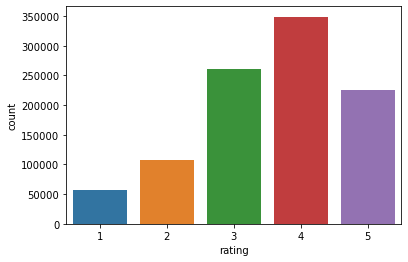

In [8]:
sns.countplot(df.rating)

### Information of rating

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   userId  1000209 non-null  int64 
 1   movie   1000209 non-null  object
 2   rating  1000209 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 22.9+ MB


In [10]:
a = df.userId.nunique()
a

6040

In [11]:
b = len(df.userId)
b

1000209

In [12]:
b/a

165.5975165562914

```json
This information referred to every people giving ratings for around 165 movies.
```

# 4. Training SVD

In [13]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [14]:
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


In [15]:
data = Dataset.load_from_df(df, Reader())
train_set = data.build_full_trainset()

In [16]:
model = SVD(n_epochs=100)
model.fit(train_set)

### Movie Rating Prediction

In [17]:
model.predict(1, 'James and the Giant Peach (1996)')

Prediction(uid=1, iid='James and the Giant Peach (1996)', r_ui=None, est=3.1558492194442884, details={'was_impossible': False})

### Movies that have been seen by userId = 1

In [18]:
watched1 = df[df['userId'] == 1]['movie']
watched1

0                One Flew Over the Cuckoo's Nest (1975)
1                      James and the Giant Peach (1996)
2                                   My Fair Lady (1964)
3                                Erin Brockovich (2000)
4                                  Bug's Life, A (1998)
5                            Princess Bride, The (1987)
6                                        Ben-Hur (1959)
7                             Christmas Story, A (1983)
8                Snow White and the Seven Dwarfs (1937)
9                              Wizard of Oz, The (1939)
10                          Beauty and the Beast (1991)
11                                          Gigi (1958)
12                        Miracle on 34th Street (1947)
13                      Ferris Bueller's Day Off (1986)
14                           Sound of Music, The (1965)
15                                     Airplane! (1980)
16                                        Tarzan (1999)
17                                         Bambi

### Movies that have been seen by userId = 2

In [19]:
watched2 = df[df['userId'] == 2].movie
watched2

53                                 Shine (1996)
54                          Verdict, The (1982)
55     Shall We Dance? (Shall We Dansu?) (1996)
56                    Courage Under Fire (1996)
57                     Untouchables, The (1987)
                         ...                   
177                         Forrest Gump (1994)
178                    Miller's Crossing (1990)
179                   Dead Poets Society (1989)
180                          Nurse Betty (2000)
181                        Graduate, The (1967)
Name: movie, Length: 129, dtype: object

### Movies that never seen before by userId = 1

In [20]:
all_movies = df.movie.unique()

In [21]:
notwatched1 = [i for i in all_movies if i not in watched1.unique()]
notwatched1

['Shine (1996)',
 'Verdict, The (1982)',
 'Shall We Dance? (Shall We Dansu?) (1996)',
 'Courage Under Fire (1996)',
 'Untouchables, The (1987)',
 'Mission: Impossible (1996)',
 'Few Good Men, A (1992)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Rebel Without a Cause (1955)',
 'Total Recall (1990)',
 'Hustler, The (1961)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'U.S. Marshalls (1998)',
 'Jackal, The (1997)',
 'GoodFellas (1990)',
 'Gladiator (2000)',
 'Double Jeopardy (1999)',
 'Yojimbo (1961)',
 'Ran (1985)',
 'Cliffhanger (1993)',
 'Snake Eyes (1998)',
 'Backdraft (1991)',
 'Fisher King, The (1991)',
 'Mister Roberts (1955)',
 'Day the Earth Stood Still, The (1951)',
 'Hunt for Red October, The (1990)',
 'Outbreak (1995)',
 'Simon Birch (1998)',
 'Stand and Deliver (1987)',
 "Breakfast at Tiffany's (1961)",
 'Maverick (1994)',
 'Stand by Me (1986)',
 'Green Mile, The (1999)',
 'Lost World: Jurassic Park, The (1997)',
 'Gandhi (1982)',
 'Strictly Ballroom (

### Movies that never seen before by userId = 2

In [22]:
notwatched2 = [i for i in all_movies if i not in watched2.unique()]
notwatched2

['James and the Giant Peach (1996)',
 'My Fair Lady (1964)',
 'Erin Brockovich (2000)',
 "Bug's Life, A (1998)",
 'Princess Bride, The (1987)',
 'Ben-Hur (1959)',
 'Christmas Story, A (1983)',
 'Snow White and the Seven Dwarfs (1937)',
 'Wizard of Oz, The (1939)',
 'Beauty and the Beast (1991)',
 'Gigi (1958)',
 'Miracle on 34th Street (1947)',
 "Ferris Bueller's Day Off (1986)",
 'Sound of Music, The (1965)',
 'Airplane! (1980)',
 'Tarzan (1999)',
 'Bambi (1942)',
 'Big (1988)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Back to the Future (1985)',
 "Schindler's List (1993)",
 'Meet Joe Black (1998)',
 'Pocahontas (1995)',
 'E.T. the Extra-Terrestrial (1982)',
 'Titanic (1997)',
 'Ponette (1996)',
 'Close Shave, A (1995)',
 'Antz (1998)',
 'Girl, Interrupted (1999)',
 'Hercules (1997)',
 'Aladdin (1992)',
 'Mulan (1998)',
 'Hunchback of Notre Dame, The (1996)',
 'Last Days of Disco, The (1998)',
 'Cinderella (1950)',
 'Sixth Sense, The (1999)',
 'Apollo 13 (1995)',
 

### Rating movie prediction for userId =1 that never seen before

In [34]:
pred1 = [model.predict(1, movie).est for movie in notwatched1]
pred1

[3.506141263493692,
 3.883148521269475,
 4.6988465705303,
 4.101187933498434,
 3.9932219061120073,
 3.4991331287669976,
 4.5539302069189675,
 3.7847159670353316,
 4.398420272032444,
 3.893198868015433,
 4.214099089471379,
 3.72804806797096,
 4.03815945939893,
 2.984258294821038,
 4.4988779411801865,
 4.091448893356102,
 3.4283687293222083,
 4.14680838908437,
 4.172527452152269,
 3.6679363951816377,
 2.9822810777054523,
 4.103123090026258,
 3.6392269558846797,
 3.8161532909279097,
 3.9766057610130336,
 4.4651203893635865,
 3.7923120332284332,
 3.993943563601002,
 3.97177731650954,
 4.169820132133076,
 2.992662147977788,
 4.485115842710219,
 4.212061084729947,
 4.192092611274311,
 3.662622216983145,
 3.508016438102911,
 4.204139407406899,
 4.645261946833498,
 3.90170795753798,
 4.441818454019543,
 3.6458800833125835,
 3.50004811039169,
 4.259635738236051,
 4.072996591182576,
 4.231986577365769,
 2.598858230275278,
 3.9120690543879437,
 4.317214109228223,
 4.576454557240227,
 4.4016074350

### Rating movie prediction for userId = 2 that never seen before

In [24]:
pred2 = [model.predict(2, movie).est for movie in notwatched2]
pred2

[3.167769121836339,
 4.138514268917192,
 3.5570079606710205,
 3.97566625533263,
 4.041790510341618,
 3.9835548100469014,
 3.8424477026321027,
 4.450028260668503,
 4.413921400273848,
 3.4156577536048647,
 3.0829556002753957,
 3.880884230579453,
 3.521542551868926,
 5,
 3.705330517616413,
 4.653391431707316,
 3.5785656056520603,
 4.1230304512506795,
 4.2637218566051125,
 3.9820599066516036,
 4.950008020229062,
 3.859851474780862,
 2.9191816227586456,
 4.254465669709754,
 4.462746820853345,
 3.4308396516262034,
 4.3036872897846346,
 3.191323908539368,
 4.3260141266356795,
 4.3730149775669265,
 4.317600527025401,
 3.7105210089528704,
 3.125022161750224,
 2.572871878881584,
 3.7360876559567675,
 3.9201663070781927,
 4.278786053712015,
 4.175347782959612,
 4.40655565877648,
 3.6976995098804943,
 4.5507146217947865,
 4.487186615208226,
 3.9898009672044696,
 3.983842044279799,
 4.248049335372418,
 3.1542488667071753,
 4.017068450185282,
 4.116133108904258,
 3.046790695717023,
 3.88279871178026

# 5. Collaborative Filtering

In [35]:
class RecommenderSystem:
    
    #PREPARATION
    def __init__(self, data):
        self.df = pd.read_csv(data)
        self.all_movies = df.movie.unique()
        self.model = None
    
    
    #TRAINING 
    def fit (self):
        data = Dataset.load_from_df(self.df, Reader())
        train_set = data.build_full_trainset()
        
        self.model = SVD()
        self.model.fit(train_set)
        

    #RECOMMENDATION
    def recommend (self, user_id, topk = 10): 
        watched = self.df[self.df.userId == user_id].movie
        notwatched = [movie for movie in self.all_movies if movie not in watched.unique()]
        pred = [self.model.predict(user_id, movie).est for movie in notwatched]
        
        result = pd.DataFrame({'movie': notwatched, 'pred_score': pred})
        result.sort_values('pred_score', ascending= False, inplace= True)
        return result.head(topk)

In [36]:
recsys = RecommenderSystem('collaborative_filtering.csv')
recsys.fit()

### Top 10 Recommendation for user_id = 1

In [37]:
recsys.recommend(user_id= 1)

,movie,pred_score
616,"Godfather, The (1972)",4.879414
452,Life Is Beautiful (La Vita � bella) (1997),4.851766
114,"Shawshank Redemption, The (1994)",4.831888
2469,"Decline of Western Civilization, The (1981)",4.777931
2178,Paths of Glory (1957),4.770513
2564,Sanjuro (1962),4.757771
640,It's a Wonderful Life (1946),4.749039
1978,"Grand Illusion (Grande illusion, La) (1937)",4.730663
381,"Godfather: Part II, The (1974)",4.723762
1980,"Bicycle Thief, The (Ladri di biciclette) (1948)",4.718737


### Top 10 Recommendation for user_id = 2

In [38]:
recsys.recommend(user_id= 2)

,movie,pred_score
20,Schindler's List (1993),4.487807
376,Life Is Beautiful (La Vita � bella) (1997),4.443255
267,Pretty Woman (1990),4.408133
315,"Cider House Rules, The (1999)",4.398050
418,When Harry Met Sally... (1989),4.385373
6,"Christmas Story, A (1983)",4.381354
2488,Sanjuro (1962),4.360373
44,Toy Story 2 (1999),4.357147
400,Sling Blade (1996),4.356768
23,E.T. the Extra-Terrestrial (1982),4.329380


### Top 10 Recommendation for user_id = 3

In [39]:
recsys.recommend(user_id= 3)

,movie,pred_score
719,"Sting, The (1973)",4.710444
150,"Shawshank Redemption, The (1994)",4.682988
83,Braveheart (1995),4.666015
578,Rear Window (1954),4.661553
2566,Sanjuro (1962),4.656564
642,It's a Wonderful Life (1946),4.637977
2471,"Decline of Western Civilization, The (1981)",4.617981
20,Schindler's List (1993),4.613957
1573,"Man for All Seasons, A (1966)",4.593117
270,North by Northwest (1959),4.576957
